In [42]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import libreries
import warnings
warnings.simplefilter('ignore')

In [43]:
expert_type = 'driver'

In [44]:
#results = pd.read_csv('results_tx/results_all_detail_metrics_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)
detail = pd.read_csv('results_tx/results_detail_all_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)

In [45]:
detail

,question_id,lambda_exp-nash,optimal_grade-nash,expert_sat-nash,crowd_sat-nash,satisfaction_area-nash,satisfaction_sum-nash,rel_expert_sat-nash,rel_crowd_sat-nash,rel_satisfaction_sum-nash,...,sum_gain-crowd_mean,sum_gain-expert_mean,sum_gain-mean,sum_gain-crowd_median,sum_gain-expert_median,sum_gain-median,sum_gain-crowd_majority,sum_gain-expert_majority,sum_gain-majority,median-diff
0,0.0,0.500000,1.000000,2.640541,2.295903,6.062425,4.936443,1.000000,1.000000,2.000000,...,-0.116827,-0.059643,-0.104292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.499999,1.718187,2.281091,2.196807,5.011117,4.477898,0.911467,0.963282,1.874749,...,-0.125972,0.004183,-0.098393,-0.123273,0.130291,-0.123273,-0.285960,0.130291,0.130291,1.0
2,2.0,0.500000,2.000002,2.241758,2.274169,5.098136,4.515927,1.000000,0.938884,1.938883,...,0.051612,-0.122148,0.014649,0.205882,-0.061116,0.205882,0.205882,-0.338808,0.205882,1.0
3,3.0,0.499998,1.999981,2.232046,2.333832,5.209222,4.565879,0.952831,0.999998,1.952829,...,-0.040110,0.011986,-0.028905,-0.047170,0.125527,-0.047170,0.125527,0.125527,0.125527,1.0
4,4.0,0.499999,1.820510,2.244604,2.268472,5.091821,4.513076,0.910243,0.978877,1.889119,...,-0.099243,-0.003588,-0.078433,-0.109392,0.117686,-0.109392,0.117686,0.117686,0.117686,1.0
5,5.0,0.500000,1.999994,2.245857,2.354543,5.287965,4.600399,0.987849,0.999999,1.987848,...,0.025958,-0.045200,0.015639,0.012151,-0.197555,0.012151,0.136980,-0.197555,0.136980,1.0
6,6.0,0.499996,1.999992,2.173130,2.265562,4.923361,4.438692,0.829390,0.995056,1.824446,...,-0.250847,0.087870,-0.188747,-0.473373,0.243163,-0.165669,-0.473373,0.243163,-0.473373,2.0
7,7.0,0.500000,1.000000,2.704663,1.990255,5.382969,4.694918,1.000000,0.905217,1.905217,...,-0.218606,0.002857,-0.169605,-0.216475,0.094783,-0.216475,-0.435154,0.094783,0.094783,1.0
8,8.0,0.500000,2.000003,2.185377,2.268567,4.957675,4.453944,0.894230,0.977692,1.871922,...,-0.173085,0.076139,-0.125364,-0.363248,0.276107,-0.083461,-0.363248,0.276107,-0.363248,2.0
9,9.0,0.500000,1.000000,2.634667,2.051166,5.404139,4.685833,1.000000,0.875120,1.875120,...,-0.180880,0.007152,-0.139500,-0.197368,0.124880,-0.197368,0.124880,0.124880,0.124880,1.0


In [46]:
#optimal_grade-nash
ren_dict = {'vote-kalai' : 'optimal_grade-kalai',
'crowd_mean' : 'optimal_grade-crowd_mean',
'expert_mean' : 'optimal_grade-expert_mean' ,
'mean': 'optimal_grade-mean',
'crowd_median' : 'optimal_grade-crowd_median',
'expert_median' : 'optimal_grade-expert_median',
'median' : 'optimal_grade-median',
'crowd_majority' : 'optimal_grade-crowd_majority',
'expert_majority' : 'optimal_grade-expert_majority',
'majority' : 'optimal_grade-majority'}

detail = detail.rename(columns=ren_dict)

In [47]:
measure_cols = [col for col in detail.columns if 'sat' in col or 'area' in col or 'sum_gain' in col]
#measure_cols = [col for col in measure_cols if  'rel_' not in col]

crd_sat = [col for col in measure_cols if  'crowd_sat'  in col and 'rel' not in col]
exp_sat = [col for col in measure_cols if  'expert_sat'  in col and 'rel' not in col]
sum_sat = [col for col in measure_cols if  'satisfaction_sum'  in col and 'rel' not in col]
area_sat = [col for col in measure_cols if  'area'  in col and 'rel' not in col]
gain_sat = [col for col in measure_cols if  'sum_gain'  in col]
rel_sat = [col for col in measure_cols if 'rel_sat' in col]
rel_area = [col for col in rel_sat if 'area' in col]
rel_sum = [col for col in rel_sat if 'sum' in col]
grade = [col for col in detail.columns if 'optimal_grade' in col]

In [48]:
crd = pd.melt(detail, id_vars=['question_id'], value_vars=crd_sat, var_name = 'method', value_name = 'crowd_sat')
crd['method'] = crd['method'].str.split('-').apply(lambda x: x[1]) 

exp = pd.melt(detail, id_vars=['question_id'], value_vars=exp_sat, var_name = 'method', value_name = 'expert_sat')
exp['method'] = exp['method'].str.split('-').apply(lambda x: x[1]) 

tot = pd.melt(detail, id_vars=['question_id'], value_vars=sum_sat, var_name = 'method', value_name = 'sum_sat')
tot['method'] = tot['method'].str.split('-').apply(lambda x: x[1]) 

area = pd.melt(detail, id_vars=['question_id'], value_vars=area_sat, var_name = 'method', value_name = 'area_sat')
area['method'] = area['method'].str.split('-').apply(lambda x: x[1]) 

gain = pd.melt(detail, id_vars=['question_id'], value_vars=gain_sat, var_name = 'method', value_name = 'diff_gain_sat')
gain['method'] = gain['method'].str.split('-').apply(lambda x: x[1]) 

r_area = pd.melt(detail, id_vars=['question_id'], value_vars=rel_area, var_name = 'method', value_name = 'rel_area_sat')
r_area['method'] = r_area['method'].str.split('-').apply(lambda x: x[1])

r_sum = pd.melt(detail, id_vars=['question_id'], value_vars=rel_sum, var_name = 'method', value_name = 'rel_sum_sat')
r_sum['method'] = r_sum['method'].str.split('-').apply(lambda x: x[1])

vote = pd.melt(detail, id_vars=['question_id'], value_vars= grade, var_name = 'method', value_name = 'optimal_grade')
vote['method'] = vote['method'].str.split('-').apply(lambda x: x[1])

In [49]:
from functools import reduce
all_detail_results = reduce(lambda left,right: pd.merge(left,right,on=['question_id', 'method']), [crd,exp,tot,area,gain,r_area, r_sum, vote])
all_detail_results = pd.merge(all_detail_results, detail[['question_id', 'median-diff']], on = 'question_id')
all_detail_results['data_set'] = 'driver'

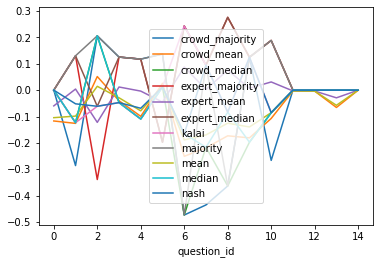

In [50]:
fig, ax = plt.subplots()
for label, grp in all_detail_results.groupby('method'):
    grp.plot(x = 'question_id', y = 'diff_gain_sat',ax = ax, label = label)

In [51]:
expert_type = 'traffic'
detail = pd.read_csv('results_tx/results_detail_all_' + expert_type + '.csv').drop('Unnamed: 0', axis = 1)

In [52]:
#optimal_grade-nash
ren_dict = {'vote-kalai' : 'optimal_grade-kalai',
'crowd_mean' : 'optimal_grade-crowd_mean',
'expert_mean' : 'optimal_grade-expert_mean' ,
'mean': 'optimal_grade-mean',
'crowd_median' : 'optimal_grade-crowd_median',
'expert_median' : 'optimal_grade-expert_median',
'median' : 'optimal_grade-median',
'crowd_majority' : 'optimal_grade-crowd_majority',
'expert_majority' : 'optimal_grade-expert_majority',
'majority' : 'optimal_grade-majority'}

detail = detail.rename(columns=ren_dict)

In [53]:
measure_cols = [col for col in detail.columns if 'sat' in col or 'area' in col or 'sum_gain' in col]
#measure_cols = [col for col in measure_cols if  'rel_' not in col]

crd_sat = [col for col in measure_cols if  'crowd_sat'  in col and 'rel' not in col]
exp_sat = [col for col in measure_cols if  'expert_sat'  in col and 'rel' not in col]
sum_sat = [col for col in measure_cols if  'satisfaction_sum'  in col and 'rel' not in col]
area_sat = [col for col in measure_cols if  'area'  in col and 'rel' not in col]
gain_sat = [col for col in measure_cols if  'sum_gain'  in col]
rel_sat = [col for col in measure_cols if 'rel_sat' in col]
rel_area = [col for col in rel_sat if 'area' in col]
rel_sum = [col for col in rel_sat if 'sum' in col]
grade = [col for col in detail.columns if 'optimal_grade' in col]

In [54]:
crd = pd.melt(detail, id_vars=['question_id'], value_vars=crd_sat, var_name = 'method', value_name = 'crowd_sat')
crd['method'] = crd['method'].str.split('-').apply(lambda x: x[1]) 

exp = pd.melt(detail, id_vars=['question_id'], value_vars=exp_sat, var_name = 'method', value_name = 'expert_sat')
exp['method'] = exp['method'].str.split('-').apply(lambda x: x[1]) 

tot = pd.melt(detail, id_vars=['question_id'], value_vars=sum_sat, var_name = 'method', value_name = 'sum_sat')
tot['method'] = tot['method'].str.split('-').apply(lambda x: x[1]) 

area = pd.melt(detail, id_vars=['question_id'], value_vars=area_sat, var_name = 'method', value_name = 'area_sat')
area['method'] = area['method'].str.split('-').apply(lambda x: x[1]) 

gain = pd.melt(detail, id_vars=['question_id'], value_vars=gain_sat, var_name = 'method', value_name = 'diff_gain_sat')
gain['method'] = gain['method'].str.split('-').apply(lambda x: x[1]) 

r_area = pd.melt(detail, id_vars=['question_id'], value_vars=rel_area, var_name = 'method', value_name = 'rel_area_sat')
r_area['method'] = r_area['method'].str.split('-').apply(lambda x: x[1])

r_sum = pd.melt(detail, id_vars=['question_id'], value_vars=rel_sum, var_name = 'method', value_name = 'rel_sum_sat')
r_sum['method'] = r_sum['method'].str.split('-').apply(lambda x: x[1])

vote = pd.melt(detail, id_vars=['question_id'], value_vars= grade, var_name = 'method', value_name = 'optimal_grade')
vote['method'] = vote['method'].str.split('-').apply(lambda x: x[1])

In [55]:
from functools import reduce
all_detail_results1 = reduce(lambda left,right: pd.merge(left,right,on=['question_id', 'method']), [crd,exp,tot,area,gain,r_area, r_sum,vote])
all_detail_results1 = pd.merge(all_detail_results1, detail[['question_id', 'median-diff']], on = 'question_id')
all_detail_results1['data_set'] = 'traffic'

In [56]:
all_detail_results = all_detail_results.append(all_detail_results1)

In [57]:
all_detail_results

,question_id,method,crowd_sat,expert_sat,sum_sat,area_sat,diff_gain_sat,rel_area_sat,rel_sum_sat,optimal_grade,median-diff,data_set
0,0.0,nash,2.295903,2.640541,4.936443,6.062425,0.000000e+00,1.000000,2.000000,1.000000,0.0,driver
1,0.0,kalai,2.295903,2.640541,4.936443,6.062425,-6.976257e-10,1.000000,2.000000,1.000000,0.0,driver
2,0.0,crowd_mean,2.256371,2.286589,4.542960,5.159393,-1.168266e-01,0.851044,1.848736,1.704097,0.0,driver
3,0.0,expert_mean,2.275721,2.459839,4.735560,5.597907,-5.964295e-02,0.923378,1.922776,1.359459,0.0,driver
4,0.0,mean,2.260612,2.324564,4.585177,5.254939,-1.042923e-01,0.866805,1.864965,1.628555,0.0,driver
...,...,...,...,...,...,...,...,...,...,...,...,...
160,14.0,expert_median,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,0.0,traffic
161,14.0,median,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,0.0,traffic
162,14.0,crowd_majority,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,0.0,traffic
163,14.0,expert_majority,2.836826,3.000000,5.836826,8.510479,0.000000e+00,1.000000,2.000000,1.000000,0.0,traffic


In [58]:
from Load_taxi_data import Load_TX_Data
question_map, alt_names, df_crowd, df_traffic, df_driver = Load_TX_Data()

In [59]:
fig = px.box(df, x="group", y="rate", points="all")

grade_k = res_kalai[res_kalai['alternative_id'] == alt]['vote'].item()

fig.add_annotation(x = 0.3, y = grade_k,
            text="Kalai",
            showarrow=True,
            arrowhead=1
            )
grade_n = res_nash[res_nash['alternative_id']== alt]['optimal_grade'].item()
fig.add_annotation(x=0.4, y=grade_n,
            text="Nash",
            showarrow=True,
            arrowhead=1)
fig.show()

NameError: name 'res_kalai' is not defined

In [60]:
all_votes = df_crowd.append(df_traffic).append(df_driver)

In [61]:
all_votes['group'] =all_votes['voter'].str.split('_').apply(lambda x: x[1] if x[1] == 'crowd' else x[0] )
all_votes = all_votes[all_votes['rate']>0]


In [75]:
alt = 8
df = all_votes[all_votes['question_id'] == alt]
title  = 'Solution for alternative number: ' + str(alt)
title
df_g = df.groupby(['group', 'rate']).size().reset_index()
df_g['percentage'] = df.groupby(['group', 'rate']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values

df_g.columns = ['group', 'rate', 'Counts', 'Percentage']

<AxesSubplot:xlabel='group', ylabel='Percentage'>

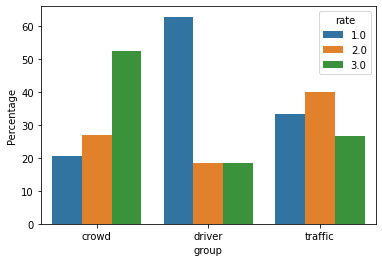

In [76]:
sns.barplot(x = 'group', y = 'Percentage',hue = 'rate', data = df_g)

In [77]:
plot_data_and_solution(df, all_detail_results, title, alt)

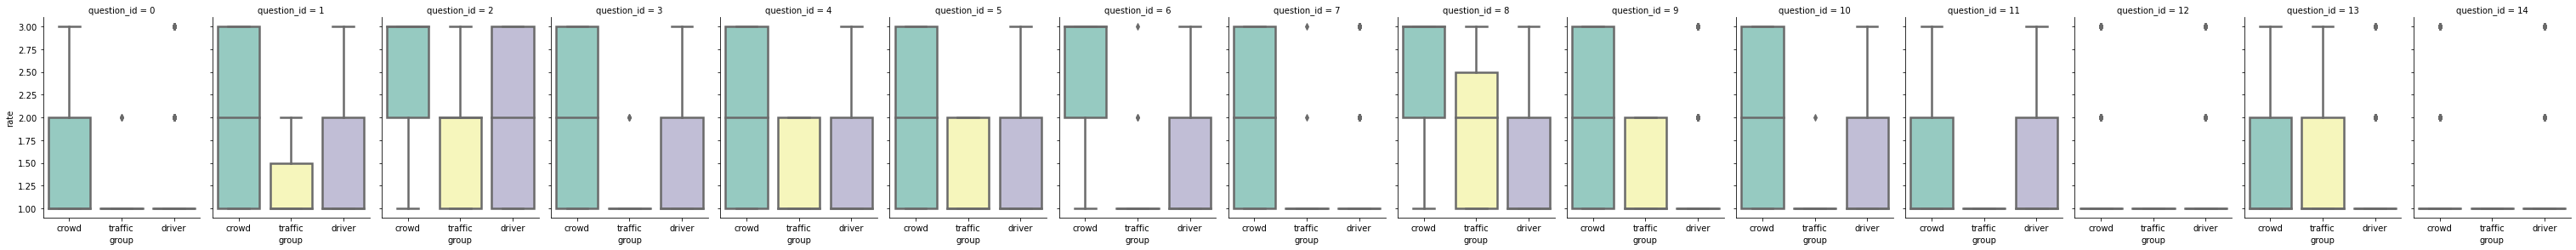

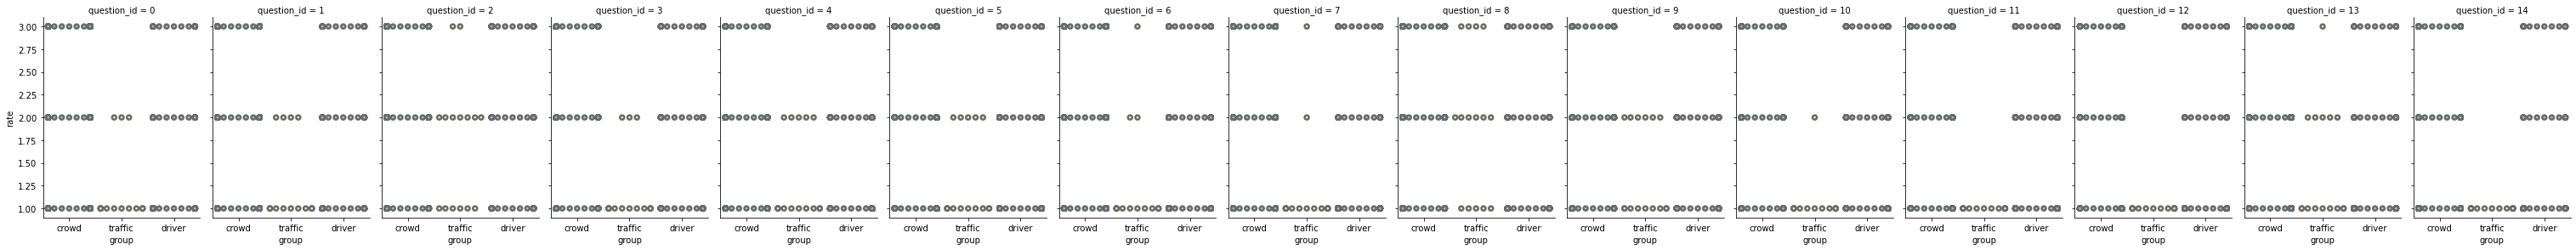

In [41]:
sns.catplot(x="group", y="rate", col = 'question_id', data=all_votes, palette="Set3", kind = 'box', linewidth=2.5, height = 4., aspect = .7)
sns.catplot(x="group", y="rate", col = 'question_id', data=all_votes, palette="Set3", kind = 'swarm', linewidth=2.5, height = 4., aspect = .7)

plt.show()

In [39]:
def plot_data_and_solution(df, all_detail_results, title, alt):
    fig = px.box(df, x="group", y="rate", points="all", title=title)
    
    grade_crm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'crowd_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 0.0, y = grade_crm,
                text="Cr mean",
                showarrow=True,
                arrowhead=1
                )

    grade_drm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 2.2, y = grade_drm,
                text="Dr mean",
                showarrow=True,
                arrowhead=1
                )

    grade_exm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x = 1.0, y = grade_exm,
                text="Exp mean",
                showarrow=True,
                arrowhead=1
                )

    grade_k_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x = 0.3, y = grade_k_tr,
                text="Kalai(tr)",
                showarrow=True,
                arrowhead=1
                )

    grade_n_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
    fig.add_annotation(x=0.6, y=grade_n_tr,
                text="Nash(tr)",
                showarrow=True,
                arrowhead=1)

    grade_k_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x = 1.3, y = grade_k_dr,
                text="Kalai(dr)",
                showarrow=True,
                arrowhead=1
                )
    grade_n_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
    fig.add_annotation(x=1.6, y=grade_n_dr,
                text="Nash(dr)",
                showarrow=True,
                arrowhead=1)

    #fig.write_image("results_tx/fig1.png")

    fig.show()
   


In [ ]:
fig = px.box(df, x="group", y="rate", points = 'all',title=title)


grade_crm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'crowd_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
fig.add_annotation(x = 0.0, y = grade_crm,
            text="Cr mean",
            showarrow=True,
            arrowhead=1
            )

grade_drm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
fig.add_annotation(x = 2.2, y = grade_drm,
            text="Dr mean",
            showarrow=True,
            arrowhead=1
            )

grade_exm = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'expert_mean') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
fig.add_annotation(x = 1.0, y = grade_exm,
            text="Exp mean",
            showarrow=True,
            arrowhead=1
            )

grade_k_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
fig.add_annotation(x = 0.3, y = grade_k_tr,
            text="Kalai(tr)",
            showarrow=True,
            arrowhead=1
            )

grade_n_tr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'traffic') ]['optimal_grade'].item()
fig.add_annotation(x=0.6, y=grade_n_tr,
            text="Nash(tr)",
            showarrow=True,
            arrowhead=1)

grade_k_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'kalai') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
fig.add_annotation(x = 1.3, y = grade_k_dr,
            text="Kalai(dr)",
            showarrow=True,
            arrowhead=1
            )
grade_n_dr = all_detail_results[(all_detail_results['question_id'] == alt) & (all_detail_results['method'] == 'nash') & (all_detail_results['data_set'] == 'driver') ]['optimal_grade'].item()
fig.add_annotation(x=1.6, y=grade_n_dr,
            text="Nash(dr)",
            showarrow=True,
            arrowhead=1)

#fig.write_image("results_tx/fig1.png")

fig.show()

In [ ]:
for i in list(np.sort(all_votes['question_id'].unique())):
    #print(i)
    alt = i
    df = all_votes[all_votes['question_id'] == alt]
    title  = 'Solution for alternative number: ' + str(alt)
    print(title)